In [1]:
using Revise

In [2]:
using DrWatson
@quickactivate :LowRankVlasov1D1V

┌ Info: Precompiling LowRankVlasov1D1V [a019a79c-4ebf-43b5-8935-89dea3e70e6f]
└ @ Base loading.jl:1423


In [3]:
using CairoMakie
using LinearAlgebra
using ProgressMeter
using ProfileView

In [5]:
domain = make_domain(nx=130, x_min=0.0, x_max=2π, nv=130, v_min=-10.0);

f0(x, v) = begin
    ρ(x) = 0.2 + exp(-(x-2)^2/.2)
    M(v, u, T) = 1 / (√(2π*T)) * exp(-(v - u)^2 / 2T)

    ρ(x) * M(v, 3.0, 1)
end

η0(x) = 3 < x < 4.5 ? 1.0 : 0.0

η0 (generic function with 1 method)

In [79]:
function threeway_truncation_error_plots(A, X, Y; r)
    fig = Figure(resolution=(1200, 1200))
    

    ax = Axis(fig[1, 1], title="Full tensor solution (A)")
    hm = heatmap!(ax, A)
    Colorbar(fig[1, 2], hm)

    ax = Axis(fig[2, 1], title="Best approximation of final state (X)")
    hm = heatmap!(ax, X)
    Colorbar(fig[2, 2], hm)

    ax = Axis(fig[3, 1], title="Truncating at every step (Y)")
    hm = heatmap!(ax, Y)
    Colorbar(fig[3, 2], hm)

    ax = Axis(fig[1, 3], title="Best approximation error (|A - X|)")
    hm = heatmap!(ax, abs.(A - X))
    Colorbar(fig[1, 4], hm)

    ax = Axis(fig[2, 3], title="Error from truncating every step (|A - Y|)")
    hm = heatmap!(ax, abs.(A - Y))
    Colorbar(fig[2, 4], hm)

    ax = Axis(fig[3, 3], title="Truncation error 'carried' over (|X - Y|)")
    hm = heatmap!(ax, abs.(X - Y))
    Colorbar(fig[3, 4], hm)

    Label(fig[0, :], text="Rank $r")
    fig
end


threeway_truncation_error_plots (generic function with 1 method)

In [67]:
fig = Figure()
ax = Axis(fig[1, 1], title="Rank of first singular value below ϵ=10⁻⁴",
xlabel="t", ylabel="rank")

t = (1:1000) .* Δt
lines!(ax, t, ranks)
ax = Axis(fig[2, 1], title="Magnitude of singular values",
xlabel="t")
lines!(ax, t, s10s, label="σ_10 / σ_1")
lines!(ax, t, s20s, label="σ_20 / σ_1")
lines!(ax, t, s40s, label="σ_40 / σ_1")
axislegend(ax, position=:lt)
save("/Users/jack/org/lowrank_notes/plots/rank_report.png", fig)

CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x00007f808b1bbbc0, 800.0, 600.0)


In [80]:
r = 10

sim1 = full_tensor_initial_condition(domain, f0, η0, q=-4);
sim2 = full_tensor_initial_condition(domain, f0, η0, q=-4);

T = 1.0
Δt = 0.001
@show nt = Int(round(T / Δt))
prog = Progress(nt)
for i in 1:nt
    next!(prog)
    step!(sim1, Δt)
    step_and_truncate!(sim2, Δt, r=r)
end

A = sim1.f
truncate!(sim1, r=r)
X = sim1.f
Y = sim2.f;

fig = threeway_truncation_error_plots(A, X, Y, r=10)
save("/Users/jack/org/lowrank_notes/plots/threeway_rank_10.png", fig)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:22


nt = Int(round(T / Δt)) = 1000


CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x00007f809dc7cdb0, 1200.0, 1200.0)


In [166]:
r = 10

sim1 = full_tensor_initial_condition(domain, f0, η0, q=-4);
sim2 = full_tensor_initial_condition(domain, f0, η0, q=-4);

T = 0.7
Δt = 0.001
@show nt = Int(round(T / Δt))
prog = Progress(nt)
for i in 1:nt
    next!(prog)
    step!(sim1, Δt)
    take_truncated_step!(sim2, Δt, r=r)
end

A = sim1.f
truncate!(sim1, r=r)
X = sim1.f
Y = sim2.f;

fig = threeway_truncation_error_plots(A, X, Y, r=10)
save("/Users/jack/org/lowrank_notes/plots/taking_truncated_steps_rank_10.png", fig)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:21


nt = Int(round(T / Δt)) = 700


CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x00007f808b06d790, 1200.0, 1200.0)


In [81]:
r = 20

sim1 = full_tensor_initial_condition(domain, f0, η0, q=-4);
sim2 = full_tensor_initial_condition(domain, f0, η0, q=-4);

T = 1.0
Δt = 0.001
@show nt = Int(round(T / Δt))
prog = Progress(nt)
for i in 1:nt
    next!(prog)
    step!(sim1, Δt)
    step_and_truncate!(sim2, Δt, r=r)
end

A = sim1.f
truncate!(sim1, r=r)
X = sim1.f
Y = sim2.f;

fig = threeway_truncation_error_plots(A, X, Y, r=20)
save("/Users/jack/org/lowrank_notes/plots/threeway_rank_20.png", fig)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:24


nt = Int(round(T / Δt)) = 1000


CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x00007f808e0111d0, 1200.0, 1200.0)


Progress: 100%|█████████████████████████████████████████| Time: 0:00:23


nt = Int(round(T / Δt)) = 1000


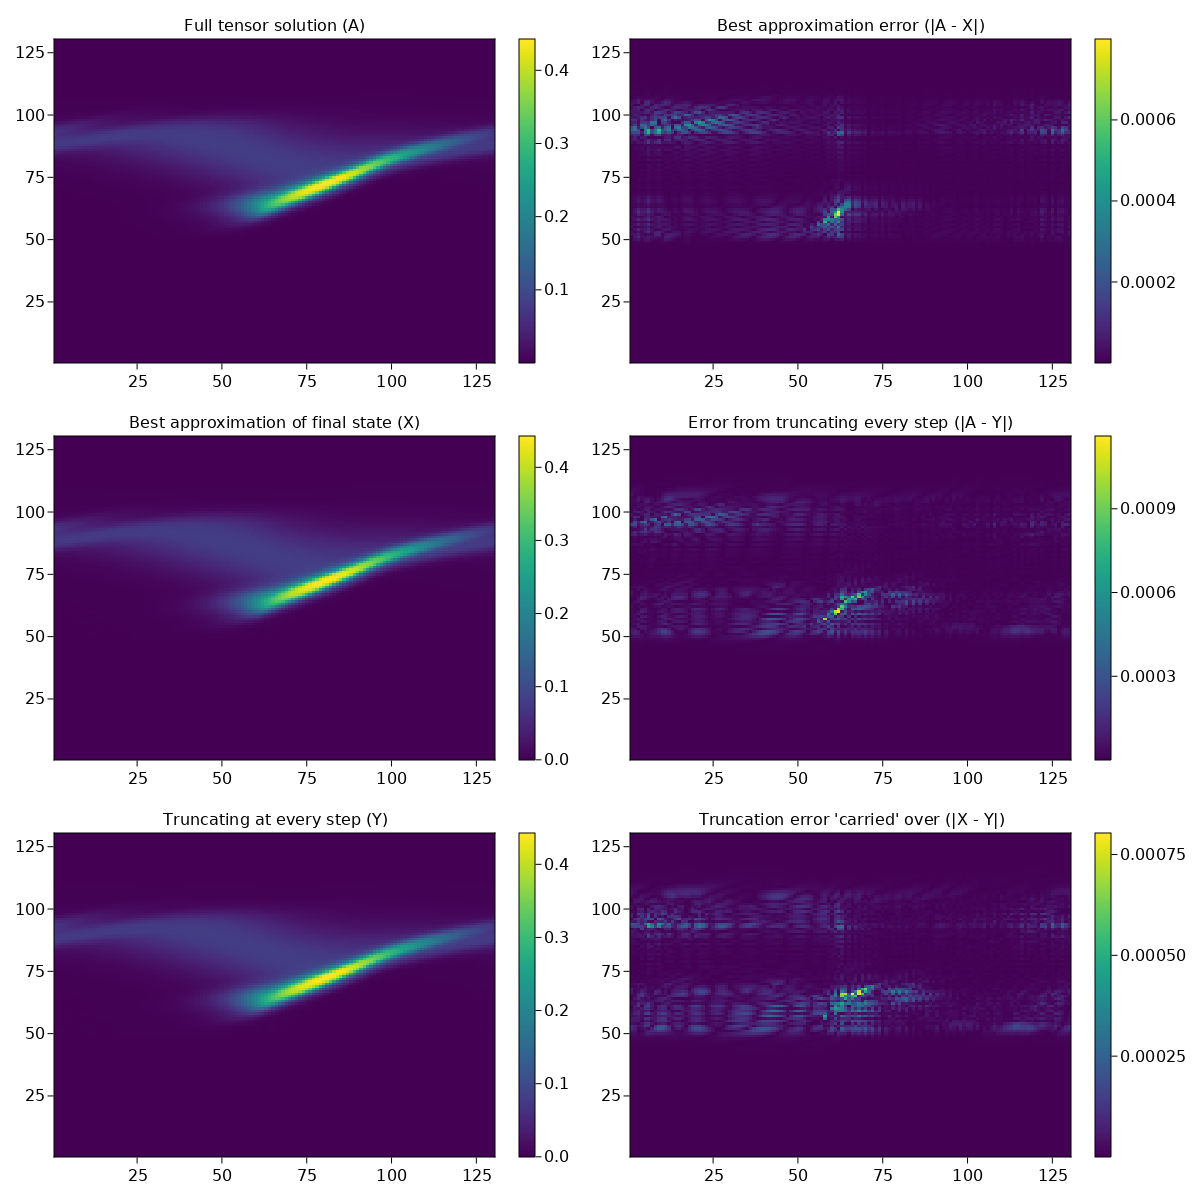

In [62]:
r = 40

sim1 = full_tensor_initial_condition(domain, f0, η0, q=-4);
sim2 = full_tensor_initial_condition(domain, f0, η0, q=-4);

T = 1.0
Δt = 0.001
@show nt = Int(round(T / Δt))
prog = Progress(nt)
for i in 1:nt
    next!(prog)
    step!(sim1, Δt)
    step_and_truncate!(sim2, Δt, r=r)
end

A = sim1.f
truncate!(sim1, r=r)
X = sim1.f
Y = sim2.f;

fig = threeway_truncation_error_plots(A, X, Y, r=40)
save("/Users/jack/org/lowrank_notes/plots/threeway_rank_40.png", fig)

In [ ]:
threeway_truncation_error_plots(A, X, Y, r=40)

In [178]:
r = 25
sim = initial_condition(domain, f0, η0, q=-1, r=r);

fig = Figure(resolution=(1200, 800))
spots = [(1, 1), (1, 3), (2, 1), (2, 3)]
dTs = [0.0, 0.4, 0.4, 0.2]
ts = [0.0, 0.4, 0.8, 1.0]

t = 0.0
Δt = 0.001

for i in 1:4
    dT = dTs[i]
    @show nt = Int(round(dT / Δt))
    prog = Progress(nt)
    for i in 1:nt
        next!(prog)
        step!(sim, Δt)
        t += Δt
    end
    
    row, col = spots[i]
    ax = Axis(fig[row, col], title="t = $(ts[i])")
    hm = heatmap!(ax, expand_f(sim))
    Colorbar(fig[row, col+1], hm)
end

save("/Users/jack/org/lowrank_notes/plots/dlra_rank_30.png", fig)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


nt = Int(round(dT / Δt)) = 0
nt = Int(round(dT / Δt)) = 400
nt = Int(round(dT / Δt)) = 400
nt = Int(round(dT / Δt)) = 200


CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x00007f808b076d30, 1200.0, 800.0)


In [70]:
r = 20
sim = initial_condition(domain, f0, η0, q=-4, r=r);

fig = Figure(resolution=(1200, 800))
spots = [(1, 1), (1, 3), (2, 1), (2, 3)]
dTs = [0.0, 0.4, 0.4, 0.2]
ts = [0.0, 0.4, 0.8, 1.0]

t = 0.0
Δt = 0.0001

for i in 1:4
    dT = dTs[i]
    @show nt = Int(round(dT / Δt))
    prog = Progress(nt)
    for i in 1:nt
        next!(prog)
        step!(sim, Δt)
        t += Δt
    end
    
    row, col = spots[i]
    ax = Axis(fig[row, col], title="t = $(ts[i])")
    hm = heatmap!(ax, expand_f(sim))
    Colorbar(fig[row, col+1], hm)
end

save("/Users/jack/org/lowrank_notes/plots/dlra_rank_20_dt_0.0001.png", fig)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:10
Progress: 100%|█████████████████████████████████████████| Time: 0:00:10
Progress: 100%|█████████████████████████████████████████| Time: 0:00:06


nt = Int(round(dT / Δt)) = 0
nt = Int(round(dT / Δt)) = 4000
nt = Int(round(dT / Δt)) = 4000
nt = Int(round(dT / Δt)) = 2000


CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x00007f808e00d7e0, 1200.0, 800.0)


In [71]:
r = 40
sim = initial_condition(domain, f0, η0, q=-4, r=r);

fig = Figure(resolution=(1200, 800))
spots = [(1, 1), (1, 3), (2, 1), (2, 3)]
dTs = [0.0, 0.4, 0.4, 0.2]
ts = [0.0, 0.4, 0.8, 1.0]

t = 0.0
Δt = 0.0003

for i in 1:4
    dT = dTs[i]
    @show nt = Int(round(dT / Δt))
    prog = Progress(nt)
    for i in 1:nt
        next!(prog)
        step!(sim, Δt)
        t += Δt
    end
    
    row, col = spots[i]
    ax = Axis(fig[row, col], title="t = $(ts[i])")
    hm = heatmap!(ax, expand_f(sim))
    Colorbar(fig[row, col+1], hm)
end

save("/Users/jack/org/lowrank_notes/plots/dlra_rank_40_dt_0.0003.png", fig)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:09
Progress: 100%|█████████████████████████████████████████| Time: 0:00:09
Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


nt = Int(round(dT / Δt)) = 0
nt = Int(round(dT / Δt)) = 1333
nt = Int(round(dT / Δt)) = 1333
nt = Int(round(dT / Δt)) = 667


CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x00007f809dc74200, 1200.0, 800.0)


In [73]:
r = 40
sim = initial_condition(domain, f0, η0, q=0, r=r);

fig = Figure(resolution=(1200, 800))
spots = [(1, 1), (1, 3), (2, 1), (2, 3)]
dTs = [0.0, 0.4, 0.4, 0.2]
ts = [0.0, 0.4, 0.8, 1.0]

t = 0.0
Δt = 0.0003

for i in 1:4
    dT = dTs[i]
    @show nt = Int(round(dT / Δt))
    prog = Progress(nt)
    for i in 1:nt
        next!(prog)
        step!(sim, Δt)
        t += Δt
    end
    
    row, col = spots[i]
    ax = Axis(fig[row, col], title="t = $(ts[i])")
    hm = heatmap!(ax, expand_f(sim))
    Colorbar(fig[row, col+1], hm)
end

save("/Users/jack/org/lowrank_notes/plots/dlra_just_transport.png", fig)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:08
Progress: 100%|█████████████████████████████████████████| Time: 0:00:08
Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


nt = Int(round(dT / Δt)) = 0
nt = Int(round(dT / Δt)) = 1333
nt = Int(round(dT / Δt)) = 1333
nt = Int(round(dT / Δt)) = 667


CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x00007f808b024000, 1200.0, 800.0)


In [65]:
sim = full_tensor_initial_condition(domain, f0, η0, q=-4);

fig = Figure(resolution=(1200, 800))
spots = [(1, 1), (1, 3), (2, 1), (2, 3)]
dTs = [0.0, 0.4, 0.4, 0.2]
ts = [0.0, 0.4, 0.8, 1.0]

t = 0.0
Δt = 0.001

ranks = Int[]
s10s = Float64[]
s20s = Float64[]
s40s = Float64[]
ϵ = 1e-4

for i in 1:4
    dT = dTs[i]
    @show nt = Int(round(dT / Δt))
    prog = Progress(nt)
    for i in 1:nt
        next!(prog)
        step!(sim, Δt)
        F = svd(sim.f)
        S = F.S ./ F.S[1]
        push!(ranks, sum(S .>= ϵ))
        push!(s10s, S[10])
        push!(s20s, S[20])
        push!(s40s, S[40])
        t += Δt
    end
    
    row, col = spots[i]
    ax = Axis(fig[row, col], title="t = $(ts[i])")
    hm = heatmap!(ax, sim.f)
    Colorbar(fig[row, col+1], hm)
end

save("/Users/jack/org/lowrank_notes/plots/potential_barrier_fulltensor.png", fig)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:07
Progress: 100%|█████████████████████████████████████████| Time: 0:00:07
Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


nt = Int(round(dT / Δt)) = 0
nt = Int(round(dT / Δt)) = 400
nt = Int(round(dT / Δt)) = 400
nt = Int(round(dT / Δt)) = 200


CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x00007f808b013700, 1200.0, 800.0)


In [88]:
sim = full_tensor_initial_condition(domain, f0, η0, q=-4);

full_tensor_fs = [sim.f]
Δt = 0.001
T = 1.0
nt = 1000

prog = Progress(nt)
for i in 1:nt
    next!(prog)
    step!(sim, Δt)
    push!(full_tensor_fs, sim.f)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:05


Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


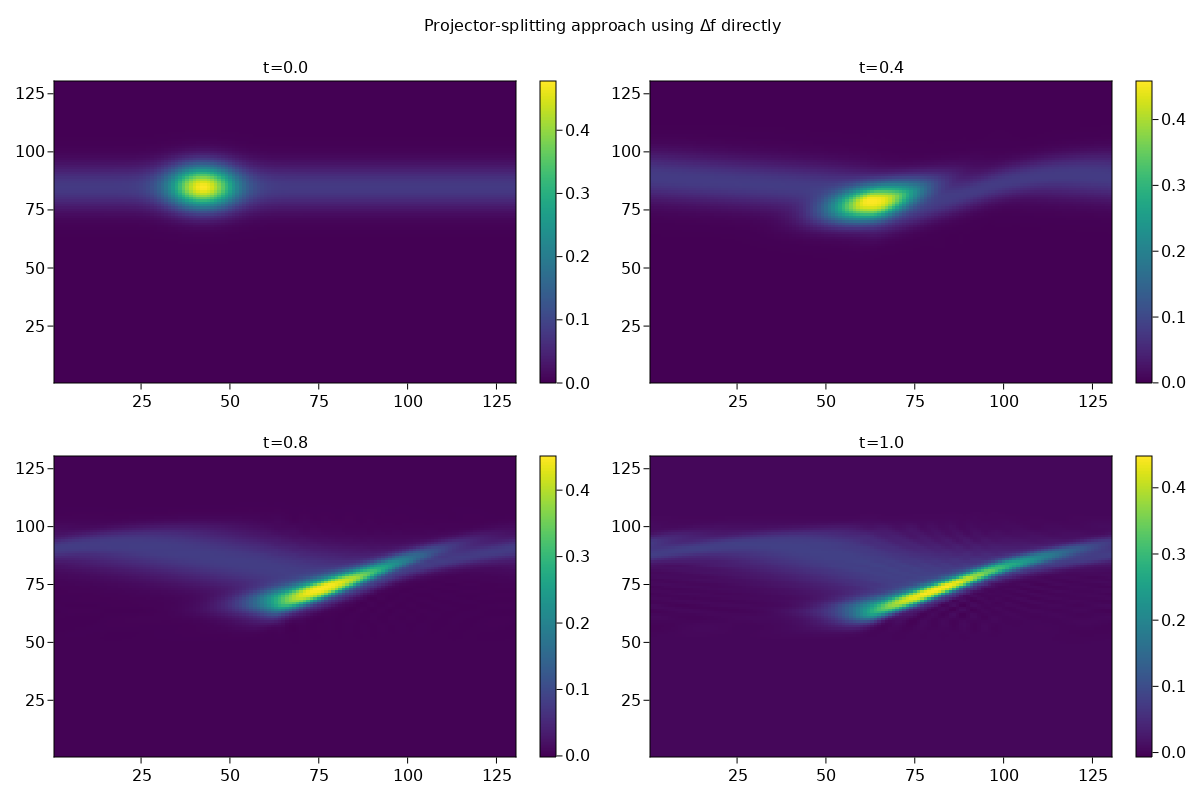

In [119]:
f = full_tensor_fs[1]
F = svd(f)
r = 20
U = F.U[:, 1:r]
S = diagm(F.S[1:r])
Vt = F.Vt[1:r, :]
V = Matrix(Vt')

Us = [U]
Ss = [S]
Vs = [V]

prog = Progress(1000)
for i in 1:1000
    next!(prog)
    f_old = f
    f = full_tensor_fs[i+1]
    Δf = f - f_old
    
    # K step
    K_0 = U * S
    K_1 = K_0 + Δf * V
    U_1, Ŝ = qr(K_1)
    U_1 = Matrix(U_1)
    
    # S step
    S̃ = Ŝ - U_1' * Δf * V
    
    # L step
    L_0 = V * S̃'
    L_1 = L_0 + Δf' * U_1
    V_1, S_1t = qr(L_1)
    V_1 = Matrix(V_1)
    
    S_1 = S_1t'
    
    push!(Us, U_1)
    push!(Ss, S_1)
    push!(Vs, V_1)
    
    
    U = U_1; S = S_1; V = V_1
    @assert size(U) == (130, r)
    @assert size(V) == (130, r)
end


fig = Figure(resolution=(1200, 800))
ks = [1, 401, 801, 1001]
spots = [(1, 1), (1, 3), (2, 1), (2, 3)]
dTs = [0.0, 0.4, 0.4, 0.2]
ts = [0.0, 0.4, 0.8, 1.0]

for i in 1:4
    k = ks[i]
    row, col = spots[i]
    ax = Axis(fig[row, col], title="t=$(ts[i])")
    hm = heatmap!(ax, Us[k] * Ss[k] * Vs[k]')
    Colorbar(fig[row, col+1], hm)
end
Label(fig[0, :], text="Projector-splitting approach using Δf directly")
save("/Users/jack/org/lowrank_notes/plots/f_increments.png", fig)
fig

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


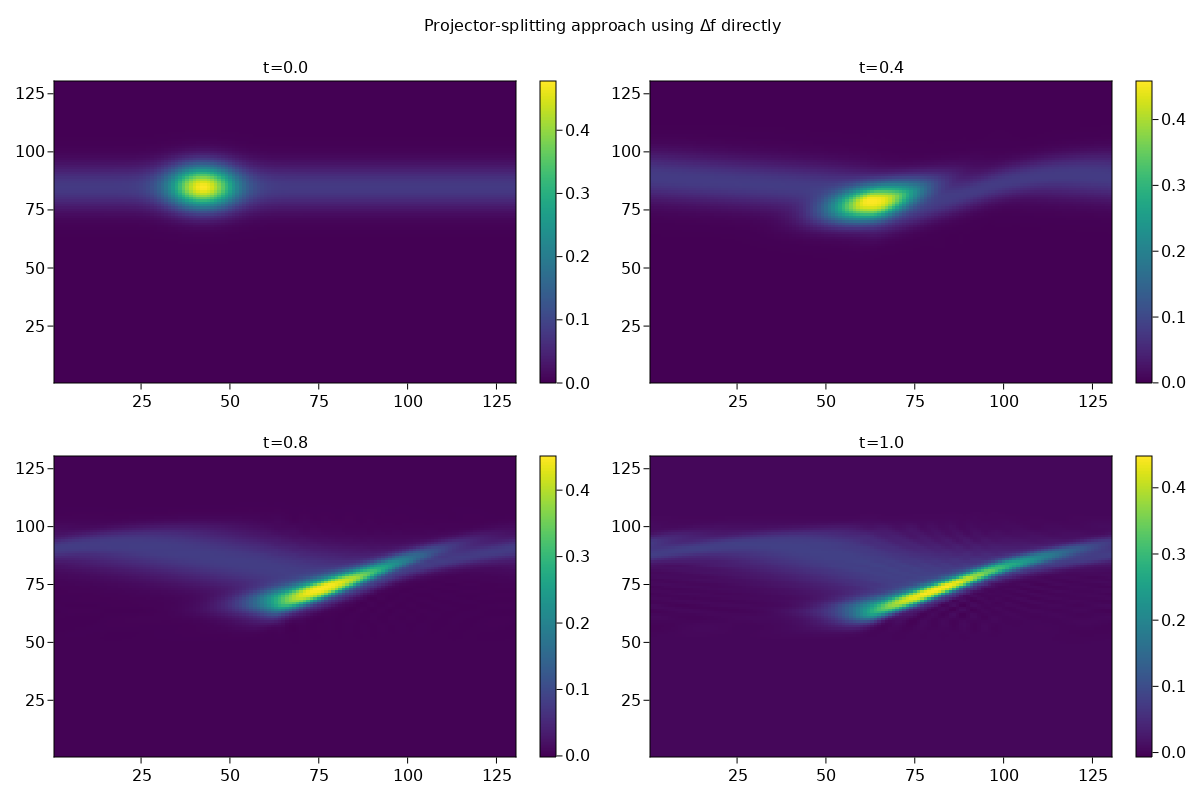

In [119]:
f = full_tensor_fs[1]
F = svd(f)
r = 20
U = F.U[:, 1:r]
S = diagm(F.S[1:r])
Vt = F.Vt[1:r, :]
V = Matrix(Vt')

Us = [U]
Ss = [S]
Vs = [V]

prog = Progress(1000)
for i in 1:700
    next!(prog)
    f_old = f
    f = full_tensor_fs[i+1]
    Δf = f - f_old
    
    # K step
    K_0 = U * S
    K_1 = K_0 + Δf * V
    U_1, Ŝ = qr(K_1)
    U_1 = Matrix(U_1)
    
    # S step
    S̃ = Ŝ - U_1' * Δf * V
    
    # L step
    L_0 = V * S̃'
    L_1 = L_0 + Δf' * U_1
    V_1, S_1t = qr(L_1)
    V_1 = Matrix(V_1)
    
    S_1 = S_1t'
    
    push!(Us, U_1)
    push!(Ss, S_1)
    push!(Vs, V_1)
    
    
    U = U_1; S = S_1; V = V_1
    @assert size(U) == (130, r)
    @assert size(V) == (130, r)
end


fig = Figure(resolution=(1200, 800))
ks = [1, 401, 801, 1001]
spots = [(1, 1), (1, 3), (2, 1), (2, 3)]
dTs = [0.0, 0.4, 0.4, 0.2]
ts = [0.0, 0.4, 0.8, 1.0]

for i in 1:4
    k = ks[i]
    row, col = spots[i]
    ax = Axis(fig[row, col], title="t=$(ts[i])")
    hm = heatmap!(ax, Us[k] * Ss[k] * Vs[k]')
    Colorbar(fig[row, col+1], hm)
end
Label(fig[0, :], text="Projector-splitting approach using Δf directly")
save("/Users/jack/org/lowrank_notes/plots/f_increments.png", fig)
fig

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


nt = Int(round(t0 / Δt)) = 30


10-element Vector{ComplexF64}:
 -1.5543122344752192e-15 - 0.9291257022651184im
 -1.5543122344752192e-15 + 0.9291257022651184im
                     0.0 - 4.353186401007591im
                     0.0 + 4.353186401007591im
   2.220446049250313e-16 - 7.417119095289422im
   2.220446049250313e-16 + 7.417119095289422im
  1.3322676295501878e-15 - 17.175575844326353im
  1.3322676295501878e-15 + 17.175575844326353im
  1.9984014443252818e-15 - 12.936722429061003im
  1.9984014443252818e-15 + 12.936722429061003im

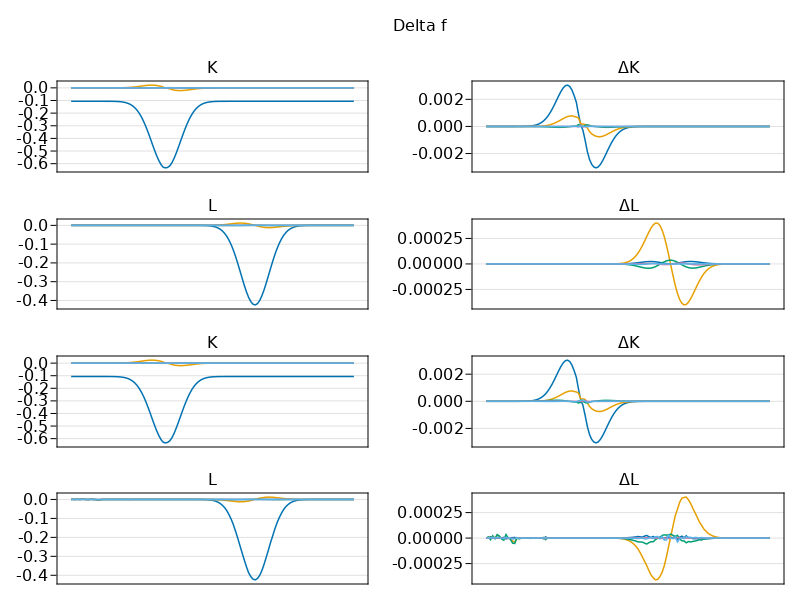

In [172]:
lowrank_sim = initial_condition(domain, f0, η0, r=10, q=0);
fulltensor_sim = full_tensor_initial_condition(domain, f0, η0, q=0);

t0 = 0.03
Δt = 0.0010
@show nt = Int(round(t0 / Δt))
prog = Progress(nt)
for i in 1:nt
    next!(prog)
    step!(lowrank_sim, Δt)
    step!(fulltensor_sim, Δt)
end

fig = Figure()
ax = Axis(fig[1, 1])
hm = heatmap!(ax, expand_f(lowrank_sim))
Colorbar(fig[1, 2], hm)
ax = Axis(fig[2, 1])
hm = heatmap!(ax, fulltensor_sim.f)
Colorbar(fig[2, 2], hm)
fig

fulltensor_f = fulltensor_sim.f
X, S, V = svd(fulltensor_sim.f)
X = X / sqrt(domain.dx); V = V / sqrt(domain.dv); S = S * sqrt(domain.dx * domain.dv);
K = X * diagm(S)
L = V * diagm(S)'
step!(fulltensor_sim, Δt)
X, S, V = svd(fulltensor_sim.f)
X = X / sqrt(domain.dx); V = V / sqrt(domain.dv); S = S * sqrt(domain.dx * domain.dv);
ΔK = (X * diagm(S)) - K
ΔL = (V * diagm(S)') - L

r = 5
fig = Figure()
ax = Axis(fig[1, 1], title="K")
for i in 1:r
    lines!(ax, K[:, i])
end
hidexdecorations!(ax)
ax = Axis(fig[1, 2], title="ΔK")
for i in 1:r
    lines!(ax, ΔK[:, i])
end
hidexdecorations!(ax)
ax = Axis(fig[2, 1], title="L")
for i in 1:r
    lines!(ax, L[:, i])
end
hidexdecorations!(ax)
ax = Axis(fig[2, 2], title="ΔL")
for i in 1:r
    lines!(ax, ΔL[:, i])
end
hidexdecorations!(ax)
Label(fig[0, :], text="Delta f")

@unpack X, S, V = lowrank_sim
K = X * S
L = V * S'
step!(lowrank_sim, Δt, debug=true)
@unpack X, S, V = lowrank_sim
ΔK = (X * S) - K
ΔL = (V * S') - L

ax = Axis(fig[4, 1], title="K")
for i in 1:r
    lines!(ax, K[:, i])
end
hidexdecorations!(ax)
ax = Axis(fig[4, 2], title="ΔK")
for i in 1:r
    lines!(ax, ΔK[:, i])
end
hidexdecorations!(ax)
ax = Axis(fig[5, 1], title="L")
for i in 1:r
    lines!(ax, L[:, i])
end
hidexdecorations!(ax)
ax = Axis(fig[5, 2], title="ΔL")
for i in 1:r
    lines!(ax, ΔL[:, i])
end
hidexdecorations!(ax)
fig


In [ ]:
L = (sim.S * sim.V')'
C² = LowRankVlasov1D1V.r_r_matrix_X(sim.X, sim.q * sim.E .* sim.X, sim.domain, sim.r)
Λ, R = eigen(Symmetric(C²))
L̂ = L * R;
Λ

In [ ]:
fig = Figure()
ax = Axis(fig[1, 1])
# lines!(ax, domain.v, L̂[:, 1])
# lines!(ax, domain.v, L̂[:, 2])
# lines!(ax, domain.v, L̂[:, 3])
# lines!(ax, domain.v, L̂[:, 4])
# lines!(ax, domain.v, L̂[:, 5])
# lines!(ax, domain.v, L̂[:, 6])
# lines!(ax, domain.v, L̂[:, 7])
# lines!(ax, domain.v, L̂[:, 8])
lines!(ax, domain.v, L̂[:, 9])
lines!(ax, domain.v, L̂[:, 10])
lines!(ax, domain.v, L̂[:, 11])
lines!(ax, domain.v, L̂[:, 12])
lines!(ax, domain.v, L̂[:, 13])
lines!(ax, domain.v, L̂[:, 14])
lines!(ax, domain.v, L̂[:, 15])
fig